In [194]:
'''
TİTANİC PROJESİ

KÜTÜPHANELERİN YÜKLENMESİ
'''
!pip install lightgbm # microsoft tarafından geliştirilen ensemble(topluluk) öğrenmesi algoritmalarından lightgbm algoritmasını indireceğiz.
!pip install catboost # yandex tarafında geliştirilen ensemble(topluluk) öğrenmesi algoritmalarından catboost algoritmasını indireceğiz.
import numpy as np # matematiksel işlemler için kullanılan numpy kütüphanesini yükleyeceğiz.
import pandas as pd # veri manipülasyonu için pandas kütüphanesini kullanacağız.
import matplotlib.pyplot as plt # görselleştirme için matplotlib ve seaborn kütüphanelerini kullanacağız.
import seaborn as sns
from collections import Counter
import warnings # uyarıları kapatmak için warnings.filterwarnings kütüphanesini import edip uyarıları 'ignore' yapacağız.
warnings.filterwarnings("ignore")
!pip install missingno  # eksik veriler arasında kolerasyon olup olmadığını anlamak için missingno kütüphanesini kullanacağız.
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor # Aykırı değerleri tespit etmek için LocalOutlierFactor kullanacağız.

In [195]:
'''
VERİYE GENEL BAKIŞ
'''
# kaggle.com'da titanic veristedi train ve test olarak ayrılmış olduğu için bizde böyle kullanacağız.
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [196]:
train_df.columns # verinin kaç kolondan oluşuğuna bakmak için  columns komutunu kullanacağız.

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [197]:
train_df.info() # veri hakkında genel bir bilgi sahibi olmak için info() fonksiyonu kullanılır.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [198]:
train_df.head() # head() fonksiyonu ile verinin ilk satırlarına bakacağız.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [199]:
train_df.describe().T # describe() ile numerik değerlerin ortalaması, standart sapması, minumun-maximum değerleri ve çeyreklerine bakacağız 

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [200]:
'''
GÖRSELLEŞTİRME
Veriyi kategorik ve numerik olarak ayırıp görselleştirme yapacağız.
kategorik değişkenler :  'Pclass', 'Name', 'Sex', 'Cabin', 'Embarked', 'Ticket', 'Survived', 'SibSp', 'Parch'
numerik değişkenler :    'Age', 'Fare'
'''

"\nGÖRSELLEŞTİRME\nVeriyi kategorik ve numerik olarak ayırıp görselleştirme yapacağız.\nkategorik değişkenler :  'Pclass', 'Name', 'Sex', 'Cabin', 'Embarked', 'Ticket', 'Survived', 'SibSp', 'Parch'\nnumerik değişkenler :    'Age', 'Fare'\n"

In [201]:
'''
KATEGORİK VERİLERİ GÖRSELLEŞTİRMEK İÇİN ÖNCE BİR FONKSİYON YAZACAĞIZ.
'''
def show_data_with_bar_plot(datas_feature):
    data_to_visualize = train_df[datas_feature]
    plt.figure(figsize=(9,3))
    plt.title(datas_feature)
    sns.countplot(data_to_visualize)
    plt.show()

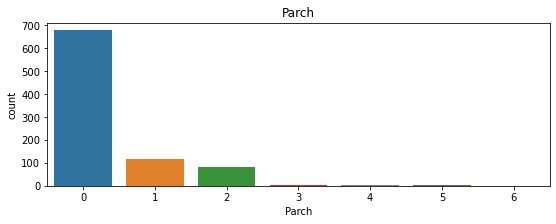

In [202]:
data_category = ['Pclass', 'Sex', 'Cabin', 'Embarked', 'Survived', 'SibSp', 'Parch']
for feature in data_category:
    show_data_with_bar_plot(feature)

In [203]:
'''
NUMERİK VERİLERİ GÖRSELLEŞTİRMEK İÇİN FONKSİYON YAZACAĞIZ.
'''
def show_data_with_histogram_plot(datas_feature):
    plt.figure(figsize=(10,6))
    sns.histplot(train_df[datas_feature])
    plt.xlabel(datas_feature)
    plt.ylabel("Frequency")
    plt.title(datas_feature)
    plt.grid()
    plt.show()

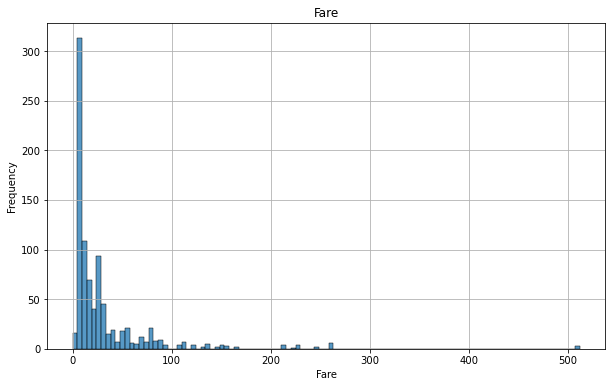

In [204]:
data_numeric = ['Age', 'Fare']
for feature in data_numeric:
    show_data_with_histogram_plot(feature)

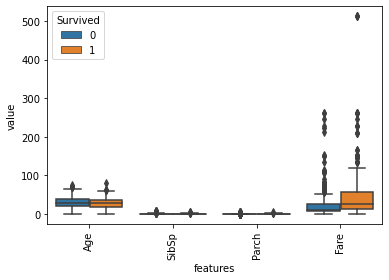

In [205]:
'''
Bu grafik bize columns listesinde verdiğimiz özelliklere(features) göre yolcuların hayatta kalıp ve kalmamasına göre ayırıp box plotlarını çizdi.
Box plot ile verdiğimiz özelliklerin(features) : medyanı(ortanca değeri), 1. 2. ve 3. çeyrekliklerini(Quantile) ve aykırı(outliers) değerleri gösterir.
Sibsp ve Parch özelliklerini boxplotlarının(kutu grafiği) tek bir çizgi halinde gözükmesinin sebebi Fare ve Age özelliklerinin Sibsp ve Parch göre göreceli olarak daha büyük değerlere sahip olmasıdır.
Verinin makine öğrenmesi modeline verilmeden önce scale(ölçekleme) yapılması gerekir. Biz şimdi scale etmiş olsaydık veriler bu grafikte daha iyi gözükürdü.
pandas kütüphanesinin içindeki pd.melt(var_name='features', value_name='value') fonksiyonunun var_name grafikteki x eksenini ve value_name ise y eksenini temsil eder.
'''
columns = ['Survived', 'Age', 'SibSp', 'Parch', 'Fare']
df_melted = pd.melt(train_df[columns], id_vars='Survived', var_name='features', value_name='value')
plt.figure()
sns.boxplot(x ='features', y='value', hue='Survived', data=df_melted)
plt.xticks(rotation=90)
plt.show()

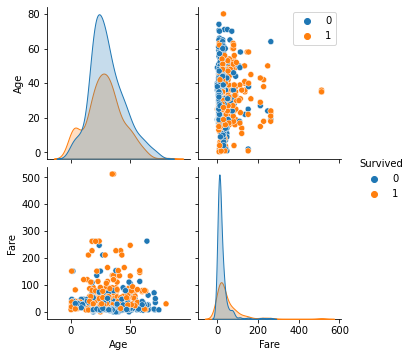

In [206]:
# Hayatta kalmaya(Survived) göre Age(yaş) ve Fare(ücret) dağılımları
plt.figure(figsize=(18,18))
sns.pairplot(train_df[['Survived', 'Age', 'Fare']], diag_kind="kde", hue='Survived')
plt.legend()
plt.show()

In [207]:
'''
TEMEL VERİ ANALİZİ (Basic Data Analysis)
    Bu kısımda hayatta halma ile ilişkili olabilecek özellikleri(features) inceleyeceğiz.
    1) Titanik gemisindeki yolcuların hayatta kalmaları(Survived) ile biniş sınıfı(Pclass) arasındaki ilişki
        Pclass vs Survived 
    2) Yolcuların cinsiyetleri(Sex) ile hayatta kalmaları(Survived) arasındaki ilişki
        Sex vs Survived
    3) Yolcuların kardeş veya eş sayıları(SibSp - Number of Siblings/Spouses Aboard) ile hayatta kalmaları(Survived) arasındaki ilişki
        SibSp vs Survived
    4) Yolcuların ebeveyn veya kardeş sayıları(Parch - Number of Parents/Children Aboard) ile hayatta kalmaları(Survived) arasındaki ilişki
        Parch vs Survived
    5) Yolcuların bilet ücretleri(Fare) ile hayatta kalmaları(Survived) arasındaki ilişki
        Fare vs Survived
    6) Yolcuların yaşları(Age) ile hayatta kalmaları(Survived) arasındaki ilişkiyi daha sonra inceleyeceğiz.
        Age vs Survived
'''

'\nTEMEL VERİ ANALİZİ (Basic Data Analysis)\n    Bu kısımda hayatta halma ile ilişkili olabilecek özellikleri(features) inceleyeceğiz.\n    1) Titanik gemisindeki yolcuların hayatta kalmaları(Survived) ile biniş sınıfı(Pclass) arasındaki ilişki\n        Pclass vs Survived \n    2) Yolcuların cinsiyetleri(Sex) ile hayatta kalmaları(Survived) arasındaki ilişki\n        Sex vs Survived\n    3) Yolcuların kardeş veya eş sayıları(SibSp - Number of Siblings/Spouses Aboard) ile hayatta kalmaları(Survived) arasındaki ilişki\n        SibSp vs Survived\n    4) Yolcuların ebeveyn veya kardeş sayıları(Parch - Number of Parents/Children Aboard) ile hayatta kalmaları(Survived) arasındaki ilişki\n        Parch vs Survived\n    5) Yolcuların bilet ücretleri(Fare) ile hayatta kalmaları(Survived) arasındaki ilişki\n        Fare vs Survived\n    6) Yolcuların yaşları(Age) ile hayatta kalmaları(Survived) arasındaki ilişkiyi daha sonra inceleyeceğiz.\n        Age vs Survived\n'

In [208]:
# 1. Sınıf yolcu % 62 ihtimalle, 2. Sınıf yolcu % 47 3. Sınıf yolcular ise % 24 oranında hayatta kalmışlar.
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by = "Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [209]:
# Kadın yolcuların erkek yolculara göre hayatta kalma olasılıkları daha yüksek
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by = "Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [210]:
# En çok hayatta kalma olasılığı yüksek olanlar kardeş veya eş sayısı 1 olanlarmış.
train_df[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by = "Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [211]:
# Ebeveyn veya kardeş sayıları 3 olanların hayatta kalma olasılığı % 60
train_df[["Parch", "Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by = "Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [212]:
'''
AYKIRI GÖZLEM TESPİTİ (OUTLİERS DETECTİON)

Biz bu veri setinde feature bazlı ve score bazlı aykırı değer tespiti yapacağız.
İlk olarak feature bazlı aykırı değerleri tespit edelim.
Aykırı değer olabilecek özellik veya sutunları(features) yazdığımız fonksiyona vereceğiz. Vereceğimiz sutunlar = ['SibSp', 'Parch', 'Age', 'Fare']
[Pclass', 'Name', 'Sex', 'Cabin', 'Embarked', 'Ticket'] sutunları aykırı değer içermez.

'''
def iqr_detect_outliers(dataframe, data_features):
    outliers_indexs=[]
    for c in data_features:
        quantile_1 = dataframe[c].quantile(0.25)
        quantile_3 = dataframe[c].quantile(0.75)
        iqr = quantile_3 - quantile_1
        lower_tail = quantile_1 - 1.5 * iqr
        upper_tail = quantile_3 + 1.5 * iqr
        for i,j in enumerate(dataframe[c]):
            if j > upper_tail or j < lower_tail:
                outliers_indexs.append(i)
    outliers_indexs=Counter(outliers_indexs)
    multiple_outliers=[]
    for i, v in outliers_indexs.items():
        if v > 2:
            multiple_outliers.append(i)
    return multiple_outliers

In [213]:
# Verdiğimiz 4 sutundan en az 3'ünde aykırı olarak tespit edilen toplam 11 gözlem var
outliers_index = (iqr_detect_outliers(train_df, ['SibSp', 'Parch', 'Age', 'Fare']))
print(outliers_index)

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863, 745]


In [214]:
train_df.iloc[outliers_index] # Aykırı olan gözlemleri iloc ile çağıralım.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [215]:
# Aykırı gözlemleri verimizden atalım
train_df = train_df.drop(index=outliers_index)

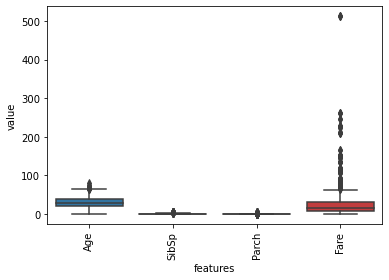

In [216]:
'''
Bu 4 kolondan(['SibSp', 'Parch', 'Age', 'Fare']) en az 3'ünde aykırı olarak tespit edilenleri silmiştik.
Şimdi ise tekrar grafiğe baktığımızda bu Fare sutununda çok fazla aykırı gözlem olduğunu görüyoruz.
Bu aykırı gözlemleri üst ve alt sınıra eşitleyeceğiz.
''' 
columns = ['Survived', 'Age', 'SibSp', 'Parch', 'Fare']
df_melted = pd.melt(train_df[columns], id_vars='Survived', var_name='features', value_name='value')
plt.figure()
sns.boxplot(x ='features', y='value', data=df_melted)
plt.xticks(rotation=90)
plt.show()

In [217]:
'''
Fare sutunundaki aykırı değerleri üst ve alt sınıra eşitledik
quantile_1 = train_df['Fare'].quantile(0.25)
quantile_3 = train_df['Fare'].quantile(0.75)
iqr = quantile_3 - quantile_1
lower_tail = quantile_1 - 1.5 * iqr
upper_tail = quantile_3 + 1.5 * iqr
for i,j in enumerate(train_df['Fare']):
    if j > upper_tail:
        train_df.loc[i, 'Fare'] = upper_tail
    elif j < lower_tail:
        train_df.loc[i, 'Fare'] = lower_tail

'''

"\nFare sutunundaki aykırı değerleri üst ve alt sınıra eşitledik\nquantile_1 = train_df['Fare'].quantile(0.25)\nquantile_3 = train_df['Fare'].quantile(0.75)\niqr = quantile_3 - quantile_1\nlower_tail = quantile_1 - 1.5 * iqr\nupper_tail = quantile_3 + 1.5 * iqr\nfor i,j in enumerate(train_df['Fare']):\n    if j > upper_tail:\n        train_df.loc[i, 'Fare'] = upper_tail\n    elif j < lower_tail:\n        train_df.loc[i, 'Fare'] = lower_tail\n\n"

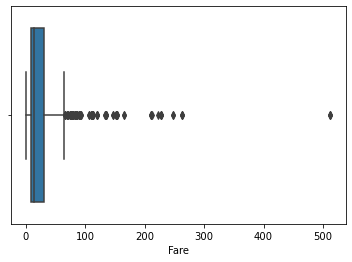

In [218]:
sns.boxplot(data = train_df, x='Fare')

In [219]:
# Feature bazında aykırı(outliers) değerleri tespit edelim
'''
def iqr_detect_outliers(dataframe,data_features):
    outliers_upper = []
    outliers_lower = []
    for c in data_features:
        quantile_1 = dataframe[c].quantile(0.25)
        quantile_3 = dataframe[c].quantile(0.75)
        iqr = quantile_3 - quantile_1
        Lower_tail = quantile_1 - 1.5 * iqr
        Upper_tail = quantile_3 + 1.5 * iqr
        for i,j in enumerate(dataframe[c]):
            if j > Upper_tail:
                dataframe.loc[i,c] = Upper_tail
                #outliers_upper.append(i)
            elif j < Lower_tail:
                dataframe.loc[i,c] = Lower_tail
                #outliers_lower.append(i)
    
    outliers=Counter(outliers)
    multiple_outliers=[]
    for i, v in outliers.items():
        if v > 2:
            multiple_outliers.append(i)
    return multiple_outliers
    '''

'\ndef iqr_detect_outliers(dataframe,data_features):\n    outliers_upper = []\n    outliers_lower = []\n    for c in data_features:\n        quantile_1 = dataframe[c].quantile(0.25)\n        quantile_3 = dataframe[c].quantile(0.75)\n        iqr = quantile_3 - quantile_1\n        Lower_tail = quantile_1 - 1.5 * iqr\n        Upper_tail = quantile_3 + 1.5 * iqr\n        for i,j in enumerate(dataframe[c]):\n            if j > Upper_tail:\n                dataframe.loc[i,c] = Upper_tail\n                #outliers_upper.append(i)\n            elif j < Lower_tail:\n                dataframe.loc[i,c] = Lower_tail\n                #outliers_lower.append(i)\n    \n    outliers=Counter(outliers)\n    multiple_outliers=[]\n    for i, v in outliers.items():\n        if v > 2:\n            multiple_outliers.append(i)\n    return multiple_outliers\n    '

In [220]:
train_df_len = len(train_df)
df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

In [221]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [222]:
'''
KAYIP VERİLER İLE MÜCADELE (MİSSİNG VALUES HANDLİNG)
'''
df.columns[df.isnull().any()] # Eksik verilerin olduğu kolonları çağırdık.

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [223]:
df.isnull().sum() # Kolonlardaki toplam eksik gözlem sayısı

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

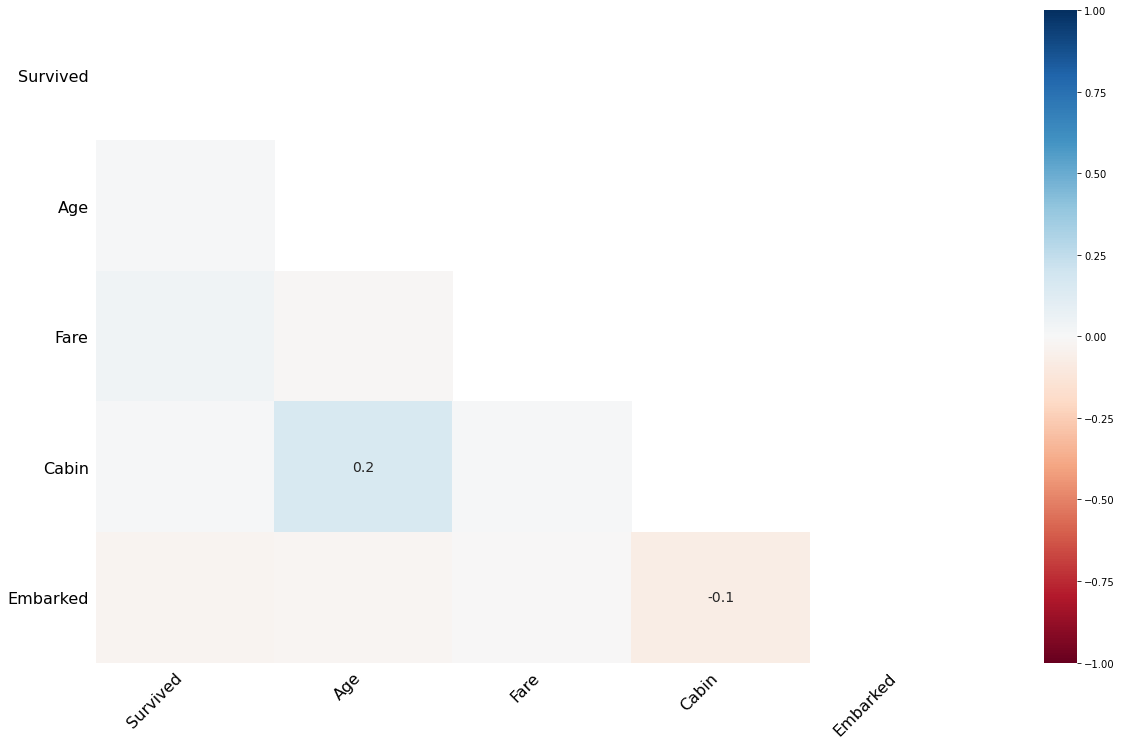

In [224]:
# Eksik veriler arasındaki kolerasyonu(ilişkiyi) görmek için missingno kütüphanesinden heatmap() fonksiyonunu kullanıyoruz.
# Bizim verisetimizde eksik gözlemlerin kendi aralarında anlamlı bir kolerasyon olmadığını bu grafikte görebiliyoruz.
msno.heatmap(df)
plt.show()

In [225]:
# Biniş yeri eksik olan yolculara baktığımız zaman Pclass(sınıf) ve Fare(ücret) benzer olan yolcular ile kıyaslayıp Embark(biniş yeri) tahmin edeceğiz.
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
820,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


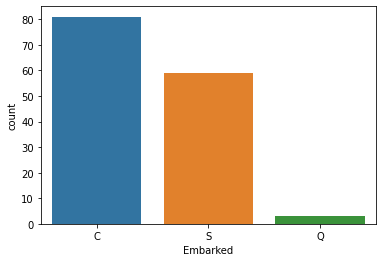

In [226]:
sns.countplot(df[(df["Pclass"] ==1) & (df["Fare"]>70)]["Embarked"])

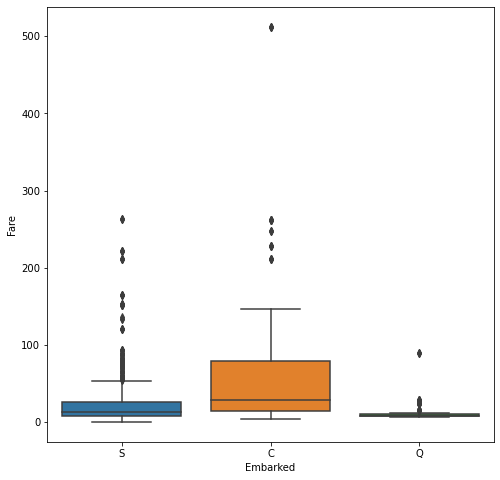

In [227]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Embarked", y = "Fare", data=df)

In [228]:
# Biniş yeri eksik olan insanların C limanından binmiş olma ihtimali yüksek sonucuna vardık.
df.Embarked = df.Embarked.fillna("C")

In [229]:
df[df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1032,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


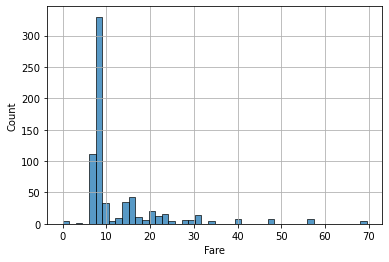

In [230]:
plt.grid()
sns.histplot(df[df["Pclass"]==3]["Fare"])
plt.show()

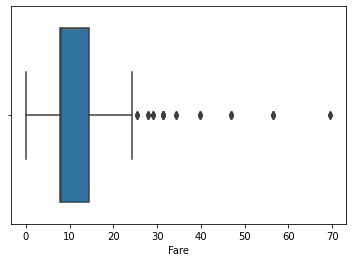

In [231]:
sns.boxplot(df[df["Pclass"]==3]["Fare"])

In [232]:
# ücret kısmı eksik olan yulcunun değerlerini kendi ile aynı sınıfta(pclass) yolculuk yapanlara bakarak dolduracağız.
df["Fare"] = df["Fare"].fillna(df[df["Pclass"]==3]["Fare"].median())

In [233]:
# Verisetinin hayatta kalmaya göre olan kolerasyonuna bakıyoruz.
train_df.corr()['Survived']

PassengerId   -0.002040
Survived       1.000000
Pclass        -0.336097
Age           -0.074085
SibSp          0.003896
Parch          0.093612
Fare           0.265561
Name: Survived, dtype: float64

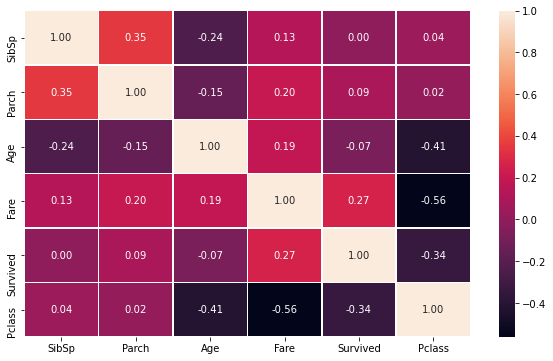

In [234]:
# Verdiğimiz kolonların birbirleri arasındaki ilişkiye bakalım.
list1 = ["SibSp", "Parch", "Age", "Sex", "Fare", "Survived", "Pclass"]
plt.figure(figsize=(10,6))
sns.heatmap(df[list1].corr(), annot=True, fmt=".2f", linecolor="w",linewidths=.5)
plt.show()

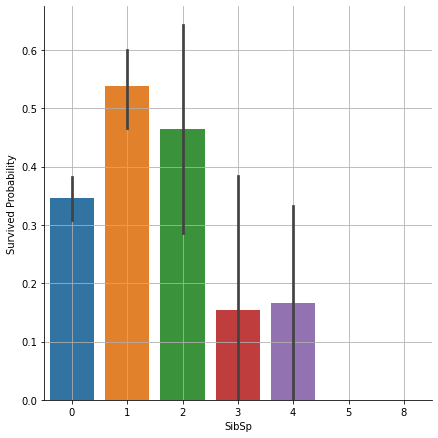

In [235]:
# SipSp vs Survived
g = sns.factorplot(x = "SibSp", y = "Survived", data = df, kind = "bar", size= 6)
plt.grid()
g.set_axis_labels(y_var="Survived Probability",x_var="SibSp")
plt.show()

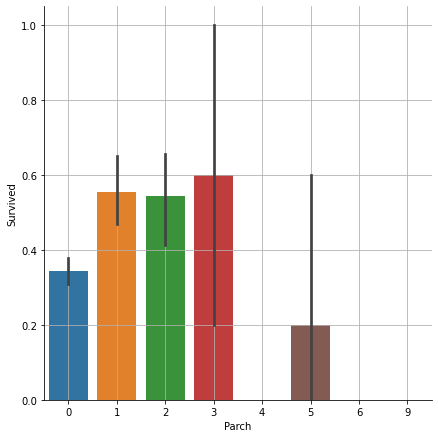

In [236]:
# Parch vs Survived
g = sns.factorplot(x ="Parch", y = "Survived", data = df, kind = "bar", size= 6)
plt.grid()
g.set_axis_labels(x_var="Parch", y = "Survived Probability")
plt.show()

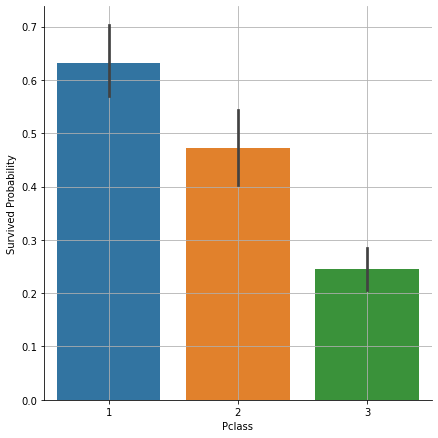

In [237]:
# Pclass vs Survived
g = sns.factorplot(x = "Pclass", y = "Survived", data = df, kind = "bar", size=6)
plt.grid()
g.set_axis_labels(x_var="Pclass", y_var = "Survived Probability")
plt.show()

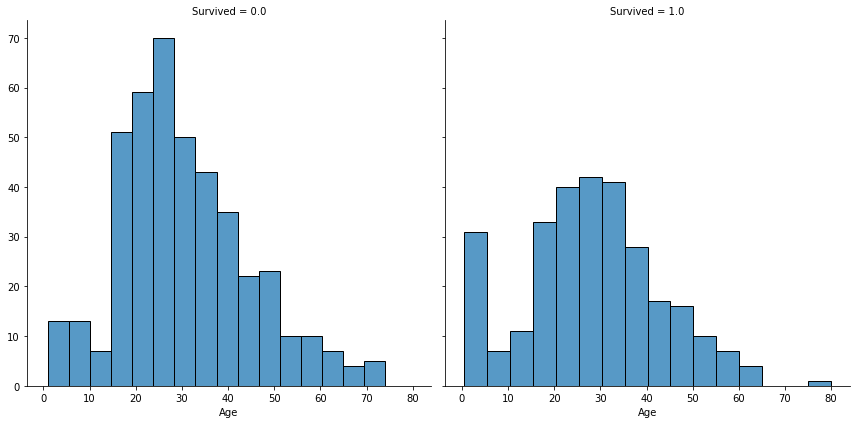

In [238]:
# Age vs Survived
g = sns.FacetGrid(df, col="Survived",size=6)
g.map(sns.histplot, "Age")
plt.show()

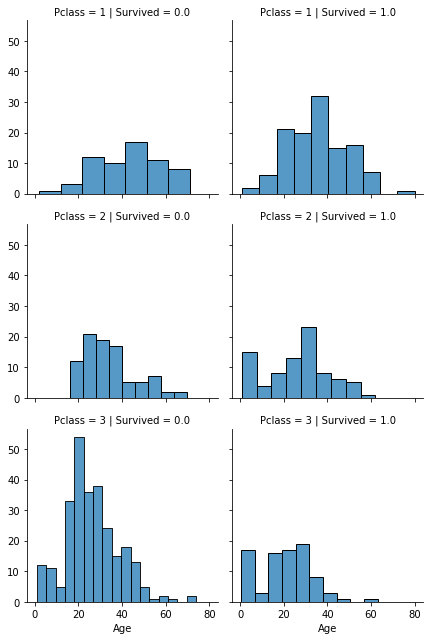

In [239]:
# Pclass, Age vs Survived
g = sns.FacetGrid(df, col= "Survived", row= "Pclass", size = 3)
g.map(sns.histplot, "Age")
g.add_legend()
plt.show()

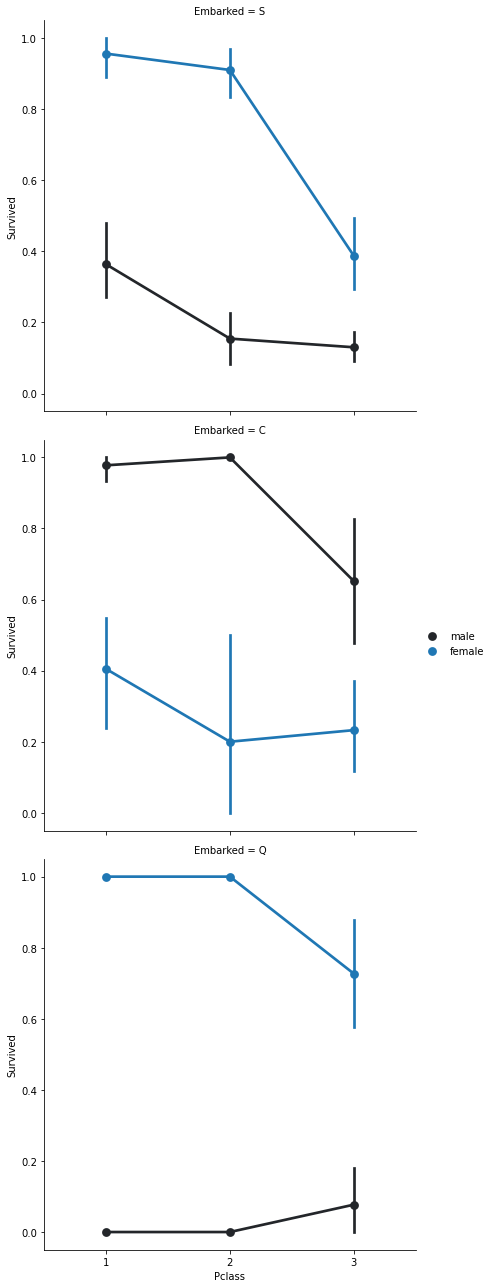

In [240]:
# Embark, Sex, Pclass vs Survived
g = sns.FacetGrid(df, row= "Embarked", size=6)
g.map(sns.pointplot, "Pclass", "Survived", "Sex")
g.add_legend()
plt.show()

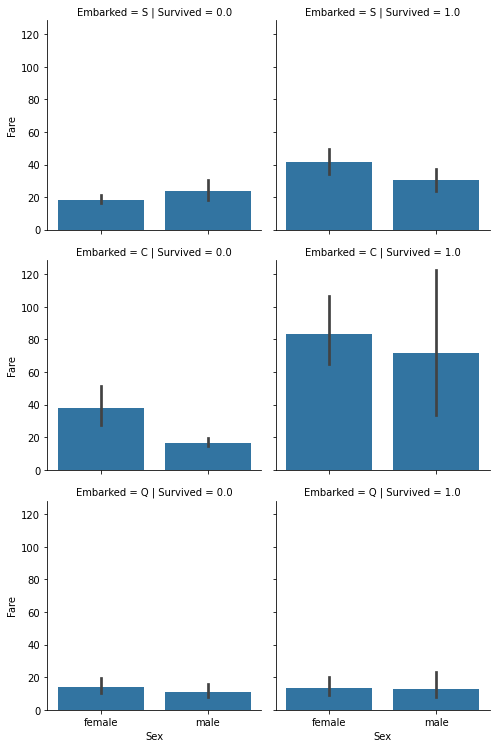

In [241]:
# Embark, Sex, Fare vs Survived
g = sns.FacetGrid(df, row= "Embarked", col= "Survived", size=3.5)
g.map(sns.barplot, "Sex", "Fare")
plt.show()

In [242]:
# Age
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1288,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1290,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1293,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1296,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


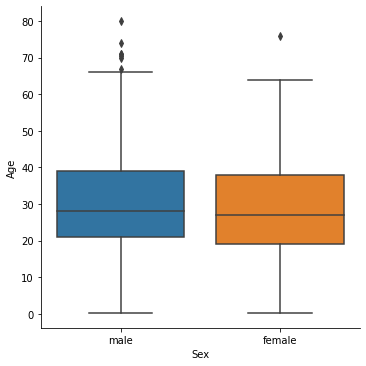

In [243]:
# Bu grafiğe bakarsak yaşları eksik olan yolcuların yaşlarını tahmin etmek cinsiyiti kullanamayız. Çünkü yaşlar yaklaşık cinsiyetlere göre eşit dağılımlı
sns.factorplot(x = "Sex", y = "Age", data = df, kind = "box")
plt.show()

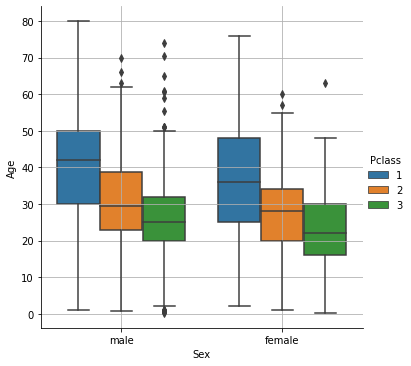

In [244]:
sns.factorplot(x = "Sex", y = "Age", hue = "Pclass", data = df, kind = "box")
plt.grid()
plt.show()

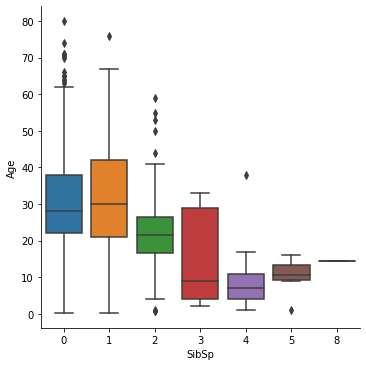

In [245]:
sns.factorplot(x = "Parch", y = "Age", data = df, kind = "box")
sns.factorplot(x = "SibSp", y = "Age", data = df, kind = "box")
plt.show()

In [246]:
# Kategorik değişken olan cinsiyeti numerik değişkene çevirelim.
sex = []
for i in df["Sex"]:
    if i == "male":
        sex.append(1)
    else:
        sex.append(0)

In [247]:
# Eski cinsiyet sutununu yeni numerik yaptığımız sutun ile değiştirelim.
df.drop(["Sex"], axis=1, inplace=True)

In [248]:
df["Sex"] = sex

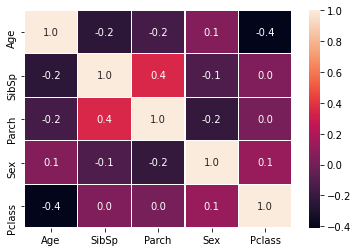

In [249]:
sns.heatmap(df[["Age","SibSp","Parch","Sex","Pclass"]].corr(), annot=True, linewidths=.2, linecolor="w", fmt=".1f")
plt.show()

In [250]:
# Age

In [251]:
# Yaş ile ilişkili olan özellikleri koşul oluşturarak dolduralım.
index_nan_age =list(df["Age"][df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = df["Age"][((df["SibSp"]==df.iloc[i]["SibSp"]) & (df["Parch"]==df.iloc[i]["Parch"]) & (df["Pclass"]==df.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred):
        df["Age"].iloc[i] = age_pred

In [252]:
# iki hala gözlem eksik onları da yaşın genel median(ortanca değer) ile dolduralım.
df["Age"][df["Age"].isnull()]

1222   NaN
1245   NaN
Name: Age, dtype: float64

In [253]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [254]:
'''
Feature Engineering

Name sutunundan ünvan kısımlarını çıkarıp tahminleme için kullanalım.
Name & Title
'''
title = []
name = df["Name"]
for i in name:
    title.append(i.split(".")[0].split(",")[-1].strip())

In [255]:
df["Title"] = title

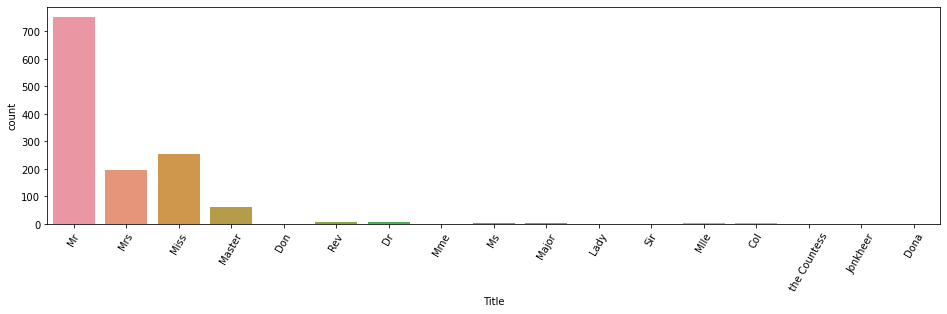

In [256]:
plt.figure(figsize=(16,4))
sns.countplot(x = "Title", data=df)
plt.xticks(rotation = 60)
plt.show()

In [257]:
unvan = df["Title"].copy()

In [258]:
# elde ettiğimiz ünvanları halk, rütbeliler ve soylular olarak 3 kategorik değişkene indirgeyelim.
for i,j in enumerate(unvan):
    if j == 'Mme' or j == 'Mlle' or j == 'Mrs' or j == 'Ms' or j == 'Miss' or j == 'Mr' :
        unvan[i]= 'Folk'
    
    elif j == 'Major' or j == 'Dr' or j == 'Capt' or j == 'Col' or j == 'Rev' or j == 'Master':
        unvan[i] = 'Ranked'
    elif j == 'Lady' or j == 'Don' or j == 'Dona' or j == 'the Countess' or j == 'Sir' or j == 'Jonkheer':
        unvan[i] = 'Royalyty'

In [259]:
unvan

0           Folk
1           Folk
2           Folk
3           Folk
4           Folk
          ...   
1293        Folk
1294    Royalyty
1295        Folk
1296        Folk
1297      Ranked
Name: Title, Length: 1298, dtype: object

In [260]:
df["Title"]=unvan

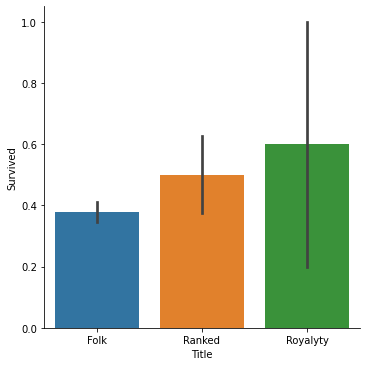

In [261]:
# Bu grafikten de anlaşılacağı gibi toplumdaki statüsü yüksek olanların kurtulma şansı daha fazla
g = sns.factorplot(x = "Title", y = "Survived", data = df, kind = "bar")
plt.show()

In [262]:
# Family
# "SibSp" + "Parch" aileyle ilişkili olduğu için tek bir yeni özellik çıkaralım
df["Family"] = df["SibSp"] + df["Parch"] + 1

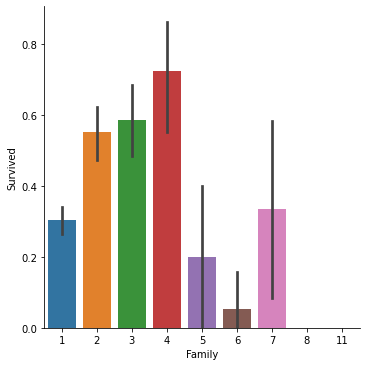

In [263]:
g = sns.factorplot(x = "Family", y = "Survived", data = df, kind = "bar")
plt.show()

In [264]:
# ailenin büyüklüğüne göre yeni bir feature çıkaralım
family_size = []
for i in df["Family"]:
    if i == 1:
       family_size.append("Alone")
    elif 1<i<5:
        family_size.append("Small Family")
    else:
        family_size.append("Big Family")

In [265]:
df["Family Size"] = family_size

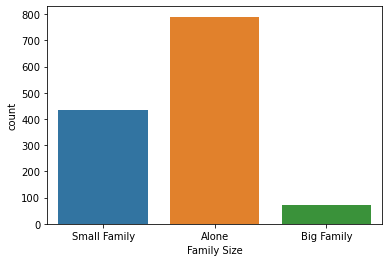

In [266]:
sns.countplot(df["Family Size"])
plt.show()

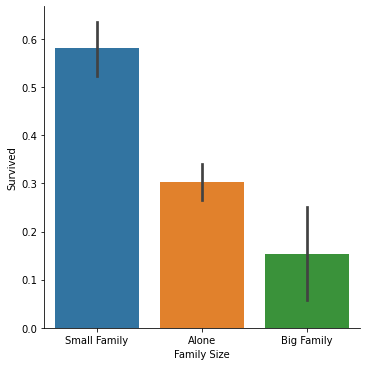

In [267]:
g = sns.factorplot(x = "Family Size", y = "Survived", data = df, kind = "bar")
plt.show()

In [268]:
# Family size ile yeni dummy variables oluşturalım.
df = pd.get_dummies(df, columns=["Family Size"])

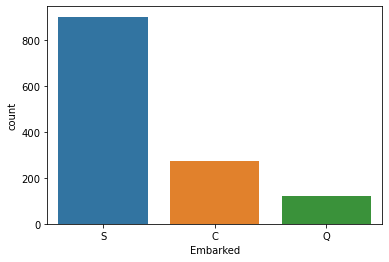

In [269]:
sns.countplot(df.Embarked)
plt.show()

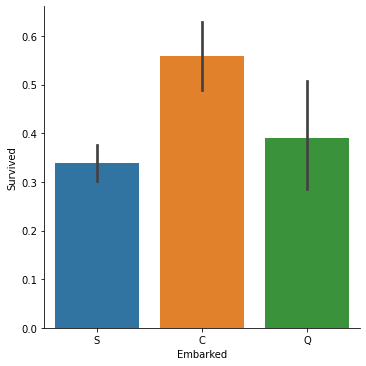

In [270]:
# Embarked
g = sns.factorplot(x = "Embarked", y = "Survived", data = df, kind = "bar")
plt.show()

In [271]:
# Biniş yerini de Dummy variabes oluşturalım.
df = pd.get_dummies(df, columns= ["Embarked"])

In [272]:
# Ticket
df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [273]:
# Biletden de yeni feature extraction yapalım.
tickets = []
for i in list(df["Ticket"]):
    if not i.isdigit():
        tickets.append(i.replace(".", "").replace("/","").strip().split()[0])
    else:
        tickets.append("x")

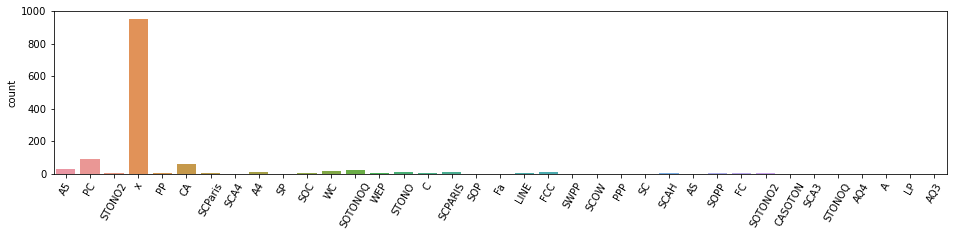

In [274]:
plt.figure(figsize=(16,3))
sns.countplot(tickets)
plt.xticks(rotation = 60)
plt.show()

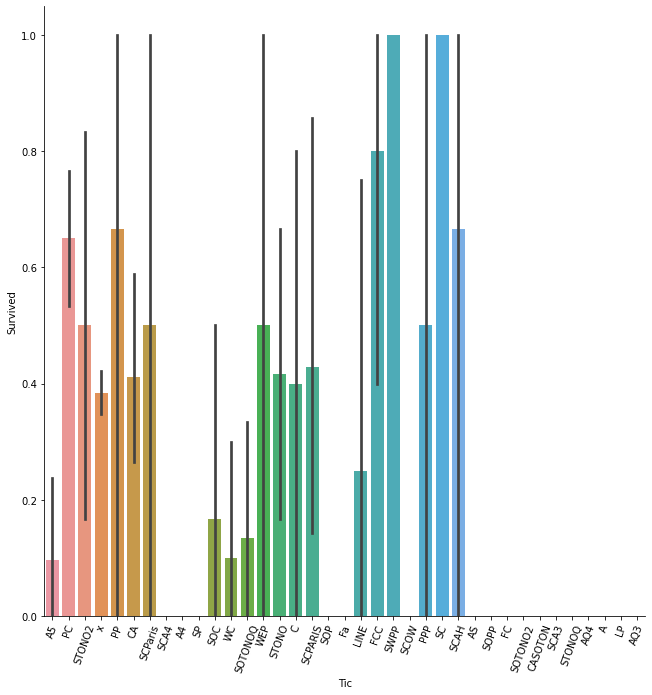

In [275]:
df["Tic"] = tickets
sns.factorplot(x="Tic", y = "Survived", data = df, kind ="bar",size=9)
plt.xticks(rotation = 70)
plt.show()

In [276]:
'''
Sklearn ile de isterseniz bu şekilde label enncoding yapabiliriz.
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
df['Tic']= label.fit_transform(df['Tic'])
'''

"\nSklearn ile de isterseniz bu şekilde label enncoding yapabiliriz.\nfrom sklearn import preprocessing \nlabel = preprocessing.LabelEncoder() \ndf['Tic']= label.fit_transform(df['Tic'])\n"

In [277]:
df = pd.get_dummies(df, columns=['Tic'])

In [278]:
# Pclass
df = pd.get_dummies(df, columns=["Pclass"])

In [279]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [280]:
# Ordinal Encoding
ordinal_Encoding = {'Folk': 1, 'Ranked': 2, 'Royalyty': 3}
df["Title"] = df["Title"].map(ordinal_Encoding)

In [281]:
train_df_len

880

In [309]:
test = df[train_df_len :]
test.drop(labels = ["Survived"], axis= 1, inplace=True)
train = df[:train_df_len]
x_train = train.drop(labels=["PassengerId", "Cabin", "Survived", "Name", "Ticket", "Family"], axis=1)
y_train = train["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=.30, random_state=15)
print("x_train" , len(x_train))
print("x_test" , len(x_test))
print("y_train" , len(y_train))
print("y_test" , len(y_test))
print("test" , len(test))

x_train 616
x_test 264
y_train 616
y_test 264
test 418


In [310]:
# Şimdi verimiz makine öğrenmesi modeline vermeye hazır hale geldi.
x_train.head()

,Age,SibSp,Parch,Fare,Sex,Title,Family Size_Alone,Family Size_Big Family,Family Size_Small Family,Embarked_C,...,Tic_STONO,Tic_STONO2,Tic_STONOQ,Tic_SWPP,Tic_WC,Tic_WEP,Tic_x,Pclass_1,Pclass_2,Pclass_3
796,31.0,0,0,7.7750,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
494,21.0,0,0,7.7500,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
754,20.0,0,0,7.2292,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
643,25.0,0,0,7.8958,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
588,36.0,1,1,24.1500,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [284]:
# CatBoostCalssifier modelimiz ile train ve test verimizin doğruluk oranına bakalım
from catboost import CatBoostClassifier
cat_model=CatBoostClassifier()
cat_model.fit(x_train, y_train)
acc_cat_train = cat_model.score(x_train, y_train)
acc_cat_test = cat_model.score(x_test, y_test)
print("train_acc", acc_cat_train) # train verisinin doğruluk olanı
print("test_acc", acc_cat_test) # test verisinin doğruluk olanı

Learning rate set to 0.008377
0:	learn: 0.6885072	total: 1.74ms	remaining: 1.74s
1:	learn: 0.6841998	total: 3.45ms	remaining: 1.72s
2:	learn: 0.6789286	total: 5.05ms	remaining: 1.68s
3:	learn: 0.6742289	total: 6.72ms	remaining: 1.67s
4:	learn: 0.6689716	total: 8.35ms	remaining: 1.66s
5:	learn: 0.6639899	total: 10.1ms	remaining: 1.67s
6:	learn: 0.6590630	total: 11.7ms	remaining: 1.66s
7:	learn: 0.6549062	total: 13.4ms	remaining: 1.66s
8:	learn: 0.6497460	total: 15ms	remaining: 1.65s
9:	learn: 0.6455072	total: 16.7ms	remaining: 1.66s
10:	learn: 0.6412587	total: 18.5ms	remaining: 1.66s
11:	learn: 0.6378750	total: 19.9ms	remaining: 1.64s
12:	learn: 0.6342517	total: 21.5ms	remaining: 1.64s
13:	learn: 0.6304776	total: 22.9ms	remaining: 1.61s
14:	learn: 0.6261623	total: 24.5ms	remaining: 1.61s
15:	learn: 0.6230268	total: 25.3ms	remaining: 1.55s
16:	learn: 0.6208350	total: 26.9ms	remaining: 1.55s
17:	learn: 0.6173012	total: 28.5ms	remaining: 1.55s
18:	learn: 0.6137862	total: 30.1ms	remaining: 

In [312]:
# LGBMClassifier(LightGBM) modelimiz ile train ve test verimizin doğruluk oranına bakalım
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train, y_train)
acc_lgb_train = lgb_model.score(x_train, y_train)
acc_lgb_testn = lgb_model.score(x_test, y_test)
print("train_acc", acc_lgb_train)
print("test_acc", acc_lgb_testn)

train_acc 0.939935064935065
test_acc 0.8484848484848485


In [286]:
# XGBoost modelimiz ile train ve test verimizin doğruluk oranına bakalım
xgboost_model = XGBClassifier()
xgboost_model.fit(x_train, y_train)
acc_xgb_train = xgboost_model.score(x_train, y_train)
acc_xgb_testn = xgboost_model.score(x_test, y_test)
print("train_acc", acc_xgb_train)
print("test_acc", acc_xgb_testn)

train_acc 0.9724025974025974
test_acc 0.8409090909090909


In [287]:
# LogisticRegression modelimiz ile train ve test verimizin doğruluk oranına bakalım
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
acc_log_train = logreg.score(x_train, y_train)
acc_log_test = logreg.score(x_test, y_test)
print("train_acc", acc_log_train)
print("test_acc", acc_log_test)

train_acc 0.8035714285714286
test_acc 0.8484848484848485


In [288]:
# Hyper parameter tuning and gridsearch
# Random Forest, SVM ve LogisticRegression modellerimizin hyper parametrelerini tune edelim.
# Score sonuçlarını cv_result listesinin içine atalım.
# best_estimator listesinin içine iste kullanıcağımız tüm modelleri atalım.
random_s =42
classifier = [  SVC(random_state=random_s, probability=True), 
                RandomForestClassifier(random_state=random_s), 
                LogisticRegression(random_state=random_s)]

svc_params_grid = { "kernel" : ["rbf"], 
                   "gamma" : [.001, .01, .1, 1], 
                   "C" : [1, 10, 50, 100, 200, 300, 1000]}

rf_params_grid = {"max_features" : [1, 3, 10], 
                  "min_samples_split" : [2, 3, 10], 
                  "min_samples_leaf" : [1, 3, 10], 
                  "bootstrap" : [False], 
                  "n_estimators" : [100, 300], 
                  "criterion" : ["gini"]}

log_params_grid = { "C" : np.logspace(-3, 3, 7), 
                   "penalty" : ['l1', 'l2', 'elasticnet', 'none']}



classifier_params = [svc_params_grid, 
                     rf_params_grid, 
                     log_params_grid]

In [289]:
# GridSearchCV ile modellerimizin en iyi parametrelerini bulanım ve cross validation(çapraz doğrulama) yapalım
# Çapraz doğrulama verinin tüm kısımlarının test ve train olma şansı vererek bize nihai doğruluk oranlarını verir.
cv_result = []
best_estimator = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid= classifier_params[i], cv = 5, scoring= "accuracy", n_jobs=-1, verbose=True)
    clf.fit(x_train, y_train)
    cv_result.append(clf.best_score_)
    best_estimator.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 5 folds for each of 28 candidates, totalling 140 fits
0.7938630999213219
Fitting 5 folds for each of 54 candidates, totalling 270 fits
0.7873328088119591
Fitting 5 folds for each of 28 candidates, totalling 140 fits
0.7971020194072909


In [290]:
# Burda da farklı olarak sadece cross validation(çapraz doğrulama) yapalım
estimator = [cat_model, xgboost_model, lgb_model]
for i in range(len(estimator)):
    accuracies = cross_val_score(estimator = estimator[i], X=x_train, y=y_train, cv=5, n_jobs=-1, verbose=True)
    cv_result.append(accuracies.mean())
    best_estimator.append(estimator[i])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished


In [291]:
# işte modellerimizin nihai sonuçları.
cv_result

[0.7938630999213219,
 0.7873328088119591,
 0.7971020194072909,
 0.7954497770784159,
 0.7856805664830843,
 0.7938368738526094]

In [292]:
# Kulllandığımız modeller
best_estimator

[SVC(C=200, gamma=0.001, probability=True, random_state=42),
 RandomForestClassifier(bootstrap=False, max_features=10, min_samples_leaf=3,
                        random_state=42),
 LogisticRegression(C=1000.0, random_state=42),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None),
 LGBMClassifier()]

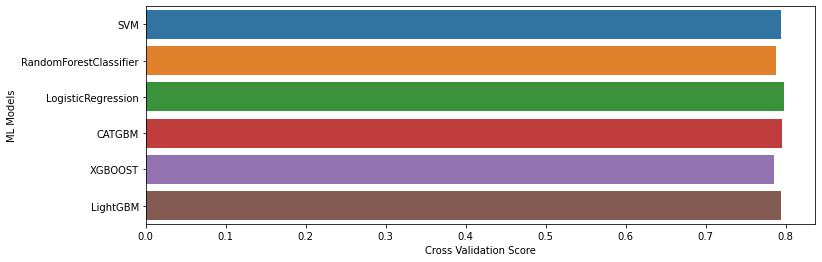

In [293]:
# modellerimizin sonuçlarını grafikte gösterelim.
result = pd.DataFrame({"Cross Validation Score" : cv_result, "ML Models" : ["SVM","RandomForestClassifier","LogisticRegression", "CATGBM", "XGBOOST", "LightGBM"]})
plt.figure(figsize=(12,4))
sns.barplot("Cross Validation Score", "ML Models", data= result)
plt.show()

In [294]:
svc = best_estimator[0]
rf = best_estimator[1]
lr = best_estimator[2]
cat = best_estimator[3]
xgb = best_estimator[4]
lightgbm = best_estimator[5]

In [295]:
# Burada isse başka ensemble(topluluk algoritması) olan Voting Classifier içine kullanmak istediğimiz modelleri vereceğiz.
votingC = VotingClassifier(estimators =[("XGB", xgb), ("RF", rf), ("LR",lr),("SVC",svc), ("CAT",cat), ("lightgbm",lightgbm)], voting="soft", n_jobs=-1)
votingC.fit(x_train, y_train)

VotingClassifier(estimators=[('XGB',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=0,
                                            num_...
                                            verbosity=None)),
                             ('RF',
                

In [296]:
# votingClassifier tahmin doğruluk oranları
print("votingClassifier train score :" ,votingC.score(x_train, y_train))
print("votingClassifier test score :" ,votingC.score(x_test, y_test))

votingClassifier train score : 0.9155844155844156
votingClassifier test score : 0.8598484848484849


In [313]:
PassengerId=test["PassengerId"]

In [317]:
test = test.drop(labels=["PassengerId", "Cabin", "Name", "Ticket", "Family"], axis=1)
test.head()

,Age,SibSp,Parch,Fare,Sex,Title,Family Size_Alone,Family Size_Big Family,Family Size_Small Family,Embarked_C,...,Tic_STONO,Tic_STONO2,Tic_STONOQ,Tic_SWPP,Tic_WC,Tic_WEP,Tic_x,Pclass_1,Pclass_2,Pclass_3
880,34.5,0,0,7.8292,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
881,47.0,1,0,7.0000,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
882,62.0,0,0,9.6875,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
883,27.0,0,0,8.6625,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
884,22.0,1,1,12.2875,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [318]:
# yarışmaya şimdi gönderebilriz
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([PassengerId, test_survived], axis=1)
results.to_csv("titanic.csv", index=False)